## Aeropendulum idea
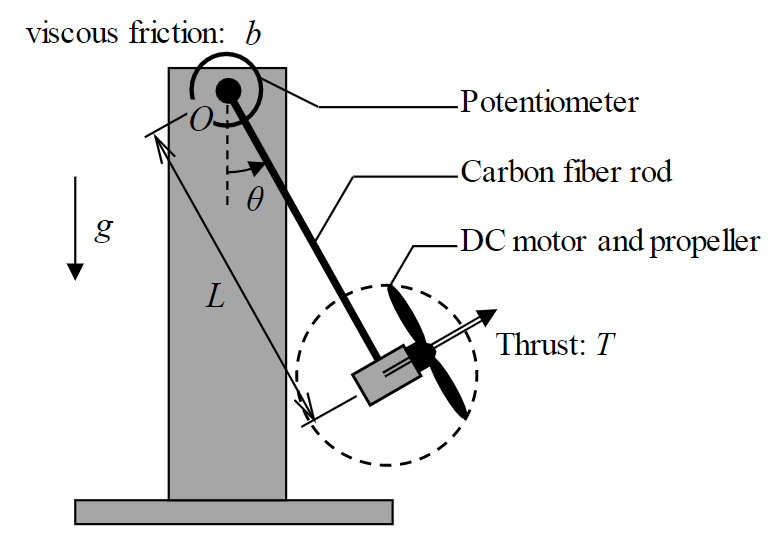

## Aeropendulum Implementação
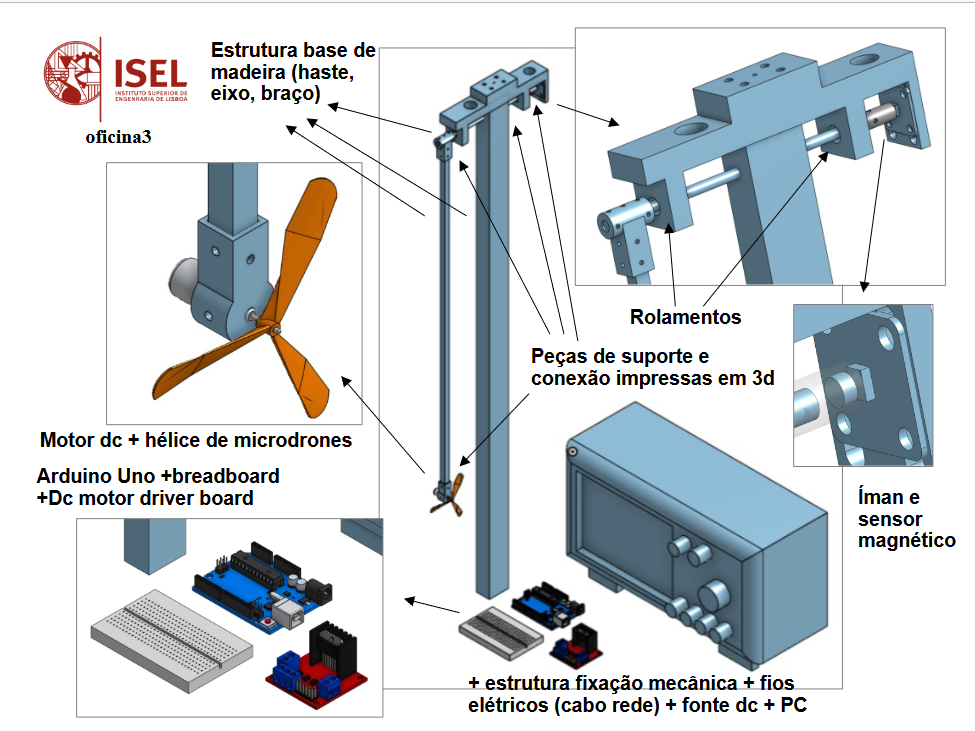

## Hardware
O sistema do aeropendulum consiste de:
- Parte mecânica: varetas para haste, eixo e braço do pendulo, rolamentos para eixo, conector eixo-braço, suportes para motor, iman e sensor, cabos eletricos finos compridos
- Circuito 'driver' para motor DC 
- Motor DC
- Hélice
- Sensor
- Microcontrolador Arduino 
- Computador PC 
- Instrumentos de bancada do laboratório: Fonte de tensão regulável, multímetro, osciloscópio, gerador de funções

## Parte mecânica
varetas para haste, eixo e braço do pendulo, conector eixo-braço, rolamentos para eixo, suportes para motor, iman e sensor, cabos eletricos finos compridos que ligam o motor e o sensor ao breadboard e arduino

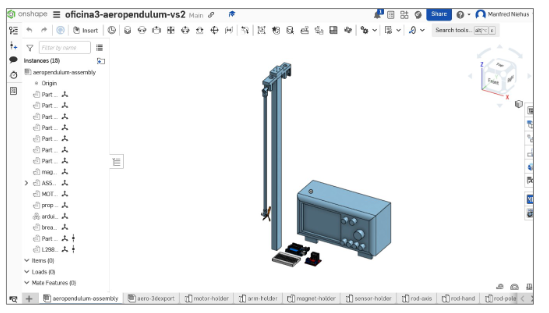

Link to onshape design files: __[aeropendulum - mechanical design](https://cad.onshape.com/documents/2ea83de1cff4e51b1cdad8b9/w/f720edbb3287e1858f6d8d69/e/7d14ad2308a118c0482dca7f)__



## Circuito driver  
Os motores elétricos tem tipicamente correntes muito superiores que o Arduino pode fornecer: os pinos 'normais' digitais (GPIO = general purpose input output) tem uma corrente máxima de 40 mA, e os pinos VCC de 5V e 3.3V e o pino do ground próximo do dobro.
Assim, para controlar a velocidade de rotação do motor é preciso controlar a magnitude da tensão e corrente média do motor através do regulamento manual ou automatico de uma fonte externa de tensão de laboratório. Esta fonte tem que ser capaz de fornecer a tensão, corrente e potência necessária para o motor. Os motores a usar no aeropendulo são de média potência, com correntes que são da ordem de poucas centenas de miliamperes quando em rotação livre (sem carga ou atrito mecânico), mas podem chegar a poucos amperes quando com carga mecânica incluindo acom hélices. 
Tensão e corrente DC no motor podem ser controlados manualmente regulando a fonte da bancada. Este deve ser sempre o primeiro ensaio a realizar com um motor DC novo. Atenção de começar com tensão e corrente nulas, e ir incrementando os valores até chegar a tensão máxima do motor (3.7 V ou 5V no caso dos motores a usar neste trabalho). 
Também é possivel implementar um controlo remoto do instrumento a partir do PC. Esta opção será estudada posteriormente na segunda parte da disciplina.
O `Circuito driver` é um circuito eletrónico com capacidade de transformar um sinal elétrico de tensão de baixa potência numa sinal de tensão com os niveis de corrente e potência necessários para o motor. É um `circuito amplificador` no sentido que amplifica uma tensão e/ou corrente pequena numa tensão e/ou corrente mais elevada. O nivel do sinal de controlo, proveniente dos pinos do arduino, determina a tensão e corrente no motor DC ligado a uma fonte de tensão e de potência. Essa tranformção é graças aos 'transistores' que permitem criar circuitos de amplificação, montados com elementos discretos, ou então num circuito integrado.

Exemplo de um transistor $TIP120$

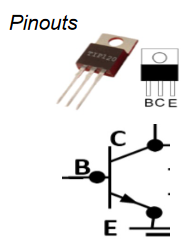

O circuito da figura implementa uma configuração que permite usar o transistor como interruptor controlável pela tensão no pino digital de saida. A ligação base-emissor é equivalente a um díodo com tensão de condução de 1.4 V. O diodo em paralelo com o motor é necessario para limitar picos de tensão.

Circuito driver baseado em transistor TIP120

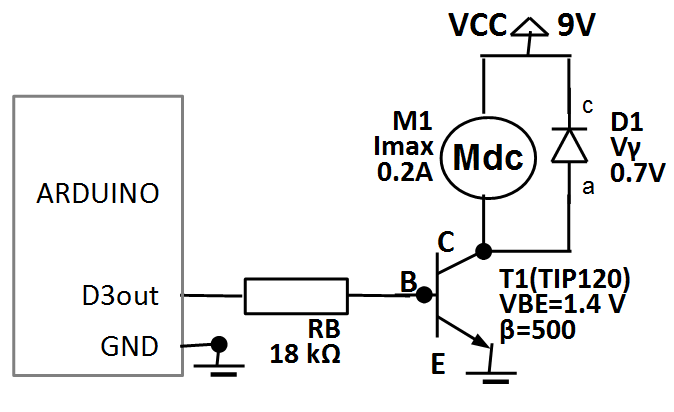

T1: Transistor TIP120
Tipo: BJT, junção bipolar, npn
Configuração Darlington  
B: Base; C: Coletor, E: emissor;
VBE-tensão base-emissor
VCE-tensão coletor-emissor
IB – corrente base
IC – corrente coletor
IE – corrente emissor

Quando a tensão no pino for LOW: o díodo BE está em corte:  as correntes IB e IC são nulas; a velocidade é zero. 
Quando a tensão no pino for HIGH: o díodo BE está em condução com a corrente IB, que é amplificada para a corrente IC, que é identica a corrente do motor e proporcional  a sua velocidade de rotação, que assim fica máxima. 

O factor de amplificação entre a corrente da base $I_B$ na malha de controlo e a corrente do coletor $I_C$ na malha do motor é dado pelo ganho $\beta$ do transistor:
$$\beta=h_{FE} \approx 500$$

Quando a junção base-emissor estiver polarizada para estado de condução do transistor 
$$V_{BE}\approx 1.4 V$$
a corrente na base $I_B$ será
$$I_B=\frac{V_{sinal}-V_{BE}}{R_B} \approx \frac{5.0V-1.4V}{18k\Omega} = 0.2 mA$$ 

a corrente no motor fica determinada pela corrente do coletor $I_C$:
$$I_{motor}=I_C=\beta \cdot I_B = 500 \cdot 0.2 = 100 mA$$



Uma opção mais robusta e mais linear para circuito driver é usar um circuito integrado para o efeito, por exemplo o `DC motor driver Breakout board 
L298N  H-bridge`, cf. figura.

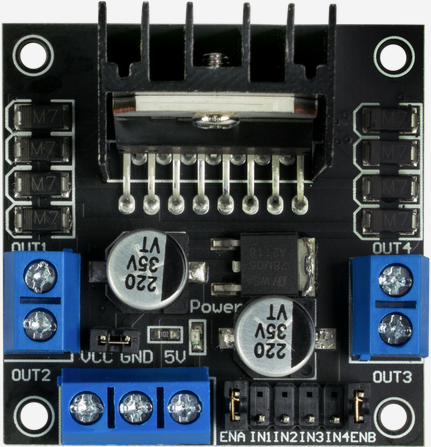

Este módulo driver de motor pode ser usado para controlar até dois motores DC ou um motor stepper bipolar.
CARACTERÍSTICAS:
- Controlador: L298N
- Integrado com pontes H baseadas em Mosfet
- Para dois motores de até 1.2 A por motor / 3 A pico
- Voltagem do Chip de controlo: 2.7 - 5.5V DC
- Tensão máx. do Motor: 15V DC
- Dimensões: 43x43x27 mm
 

Ponte H

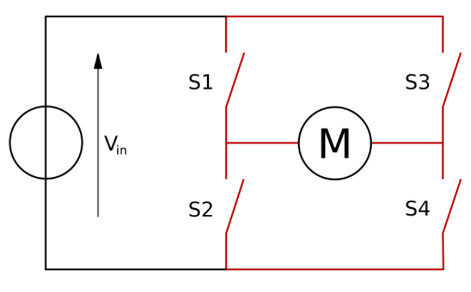

Ao contrário de outros modelos mais avançados do Arduino como por exemplo o MEGA, o arduino UNO não tem integrado nenhum conversor digital-analógico (DAC=digital analog converter). Assim, em vez de controlar a tensão DC diretamente, estas são implementadas através de um sinal de controlo PWM, ou seja: a velocidade do motor dc é controlado de modo contínuo pelo dutycycle, entre 0-100%, de modo semelhante que a intensidade no LED. 

O sinal PWM pode ser fornecido pelo arduino ou, em alternativa, para regulamento manual, por um gerador de funções.

O sinal PWM pode e deve ser observado diretamente no osciloscopio.


## Motor DC  

São usados dois motores dc nos ensaios: um mais robusto de 5V, outro um com rotação rápida dos minidrones.

- Coreless Motor de alta velocidade com hélice, Micro FPV Quadcopter, Cw CCW, Hollow Cup, DIY, DC 3.7V, 50000RPM, 716, 4x55mm, 4x55mm
- Materiais: Liga
Cor: como mostrado na pic
Descrição:
Vidro oco especificação: 7x16mm
Tensão nominal: 3.7v
Velocidade: 50000 RPM (a velocidade real pode ser alta ou baixa)
Fluxo de eletricidade: sem carga: 0.08A
Rotor bloqueado: 1.8A
Tensão nominal: 4.2 v
Fluxo de eletricidade: sem carga 0.1A, bloqueado: 2A
Velocidade: 50000RPM
Saída do eixo: 0.8mm
Saída comprimento do eixo: 7mm
Chumbo longo: aproximadamente 46mm

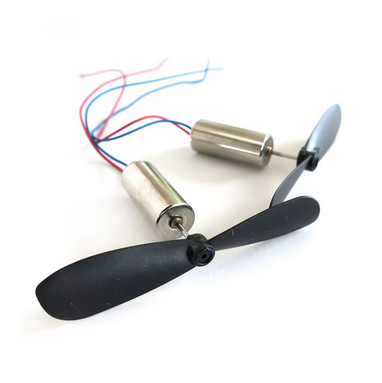

## Hélice  
- Hélice tbd

## Sensor
- encoder em geral
- encoder ótico
- encoder magnético

Sensor magnético
AS5600 Codificador Magnético Módulo Sensor de Medição de Ângulo de Indução 12bit de Alta Precisão

AS6500 é de 3.3 V !!!!!!!!!!!!!

Um módulo codificador que pode medir com muita precisão um ângulo de, por exemplo, um eixo através de um campo magnético. Para que o sensor funcione, o íman diametralmente magnetizado deve ser fixado a um eixo (por exemplo, com cola). O sensor deve então ser montado logo acima dele (máximo ~2mm).
Por defeito, o módulo funciona com 3,3V (tanto a alimentação como os sinais). 
- Arduino library “AS5600” via arduino software
- tambem em:  https://github.com/RobTillaart/AS5600

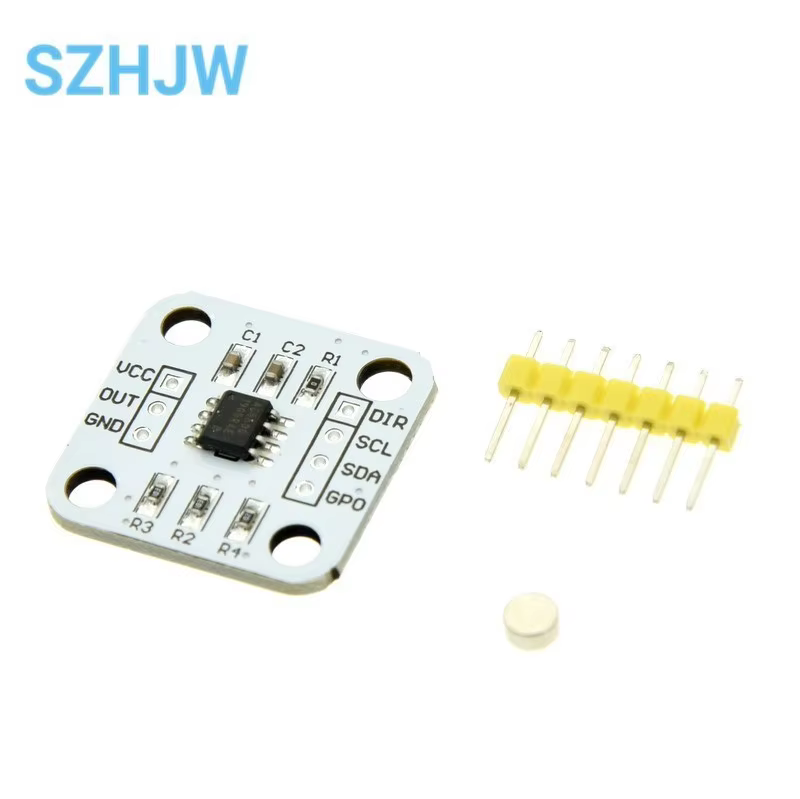

## Arduino
- Arduino ligado via USB para comunicar com PC, e com pinos ligados ao motor e ao sensor, programada enquanto sistema de controlo, incluindo gerar sinal PWM, medir angulo do sensor, e controlador PID. E para simular o processo
 
## Computador PC
- PC para programar e testar arduino, para receber dados do arduino e para análise dos dados e visualização dos resultados.

## Instrumentos da bancada de laboratório
- Fonte de tensão regulável para alimentar o circuito driver e fornecer tensão, corrente e potência necessários
- Multímetro de bancada de laboratório para analisar e verificar o funcionamento correto dos circuitos DC
- Osciloscópio de bancada de laboratório para analisar e verificar o funcionamento correto dos sinais AC
- Gerador de funções de bancada de laboratório para analisar e verificar o funcionamento correto do circuito driver e a configuração do osciloscopio